(This notebook is based off Zach Alexander's, with some minor modifications.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
cars = pd.read_csv('DATA/cars_multivariate.csv')

You just received a bunch of data... what's your first move?

Start with a very high level overview
- What do the first few rows look like?
- What feature does each column denote?
- Which features are categorical and what is the distribution for the categorical levels?
- Which features are continuous and how would I characterize the distribution?
- Are there any missing values?
- What is the target denote? What is the target's distribution look like?
- How does the features relate to one another?
- How does each feature relate to the target?

In [3]:
cars.shape

(398, 9)

In [4]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [5]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [6]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Do the variable types make sense? Notice that HP has variable type 'object' - this doesn't seem right.

In [8]:
cars['horsepower'].tail()

393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, dtype: object

All the values that we can see look like numbers. If they were all numbers, Pandas should have figured out the correct data type---there must be a weird value in there somewhere

In [9]:
# Force convert horsepower to numeric
conv = pd.to_numeric(cars['horsepower'], 'coerce')
conv

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [10]:
mask = conv.isna()
mask

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [11]:
# Check out the six bad values of horsepower
cars[conv.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [12]:
#let pandas do the heavy lifting for you. 
#optional arguments on read_csv let you deal with missing values

In [13]:
#Let's start over!!

In [14]:
# Reload the data, but now tell pandas to treat '?' as missing
#Notice that Horsepower is now a numeric column with six missing values.
cars = pd.read_csv('DATA/cars_multivariate.csv', na_values=['?'])

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [15]:
# Look at the dataset and drop rows where horsepower is notna

cars[cars.horsepower.notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [16]:
#From here forward, we'll just drop those six rows with no horsepower data
cars = cars[cars.horsepower.notna()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [17]:
# What about origin? model?
#cars.origin.value_counts()
cars['model'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model, dtype: int64

In [18]:
cars['origin'] = cars['origin'].astype(str)
cars['model'] = cars['model'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    object 
 7   origin        392 non-null    object 
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 30.6+ KB


Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [19]:
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
categorical_vars = ['model', 'origin', 'cylinders','car_name']

## More Exploration

### Univariate-Numeric Viz

In [20]:
import seaborn as sns 

In [40]:
x = cars['acceleration'].values
x

array([12. , 11.5, 11. , 12. , 10.5, 10. ,  9. ,  8.5, 10. ,  8.5, 10. ,
        8. ,  9.5, 10. , 15. , 15.5, 15.5, 16. , 14.5, 20.5, 17.5, 14.5,
       17.5, 12.5, 15. , 14. , 15. , 13.5, 18.5, 14.5, 15.5, 14. , 13. ,
       15.5, 15.5, 15.5, 15.5, 12. , 11.5, 13.5, 13. , 11.5, 12. , 12. ,
       13.5, 19. , 15. , 14.5, 14. , 14. , 19.5, 14.5, 19. , 18. , 19. ,
       20.5, 15.5, 17. , 23.5, 19.5, 16.5, 12. , 12. , 13.5, 13. , 11.5,
       11. , 13.5, 13.5, 12.5, 13.5, 12.5, 14. , 16. , 14. , 14.5, 18. ,
       19.5, 18. , 16. , 17. , 14.5, 15. , 16.5, 13. , 11.5, 13. , 14.5,
       12.5, 11.5, 12. , 13. , 14.5, 11. , 11. , 11. , 16.5, 18. , 16. ,
       16.5, 16. , 21. , 14. , 12.5, 13. , 12.5, 15. , 19. , 19.5, 16.5,
       13.5, 18.5, 14. , 15.5, 13. ,  9.5, 19.5, 15.5, 14. , 15.5, 11. ,
       14. , 13.5, 11. , 16.5, 16. , 17. , 19. , 16.5, 21. , 17. , 17. ,
       18. , 16.5, 14. , 14.5, 13.5, 16. , 15.5, 16.5, 15.5, 14.5, 16.5,
       19. , 14.5, 15.5, 14. , 15. , 15.5, 16. , 16

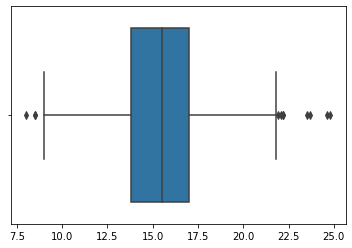

In [41]:
sns.boxplot(x)

In [42]:
sns.set(rc={'figure.figsize': (16,3)})

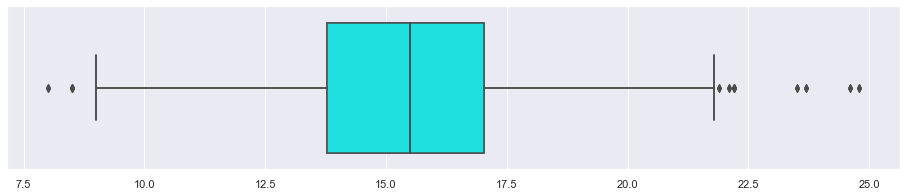

In [44]:
sns.boxplot(x)
sns.boxplot(x, color = 'aqua')

In [45]:
sns.set(rc={'figure.figsize': (16,3)})
sns.set_style("ticks")
sns.set_context("poster")


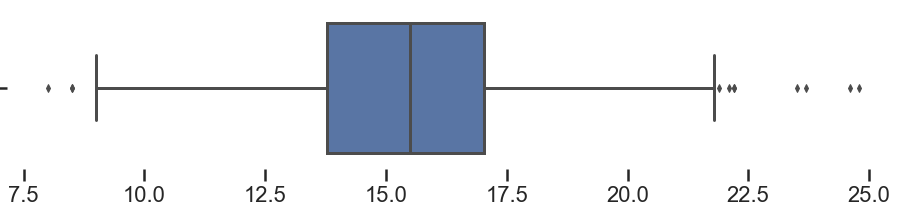

In [46]:
sns.boxplot(x)
sns.despine(left=True, bottom = True)

In [49]:
h = cars['horsepower'].values
h


array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95., 100.,
       105., 100.,  88., 100., 165., 175., 153., 150., 180., 170., 175.,
       110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,  60.,
        70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153., 150.,
       208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,  76.,
        87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145., 137.,
       150., 198., 150., 158., 150., 215., 225., 175., 105., 100., 100.,
        88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,  94.,
        90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112., 150.,
       110., 122., 180.,  95., 100., 100.,  67.,  80.,  65.,  75., 100.,
       110., 105., 140., 150., 150., 140., 150.,  83.,  67.,  78.,  52.,
        61.,  75.,  75.,  75.,  97.,  93.,  67.,  9

In [54]:
d= x,h


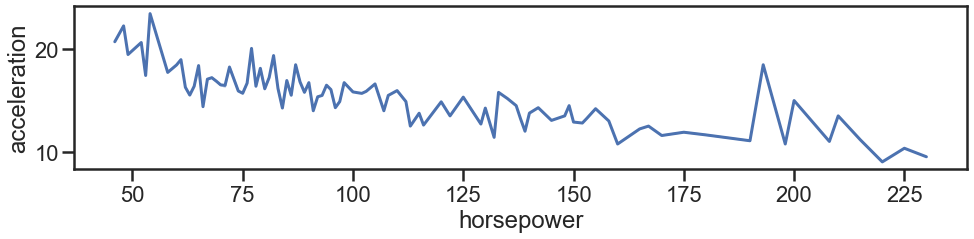

In [70]:
ax =sns.lineplot(y = 'acceleration', x = 'horsepower', data = cars, ci= False)

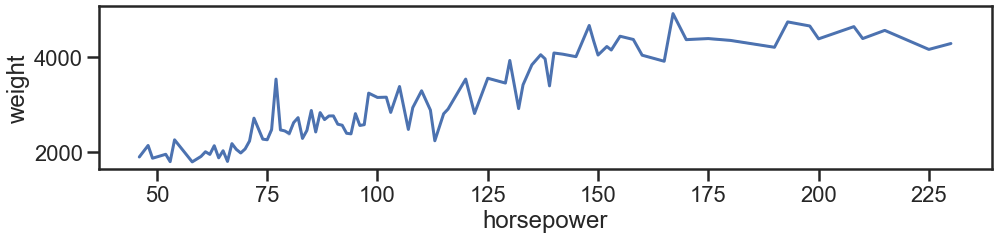

In [73]:
dx = sns.lineplot(y = 'weight', x = 'horsepower', data = cars, ci= False)

In [77]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'binned_acceleration'],
      dtype='object')

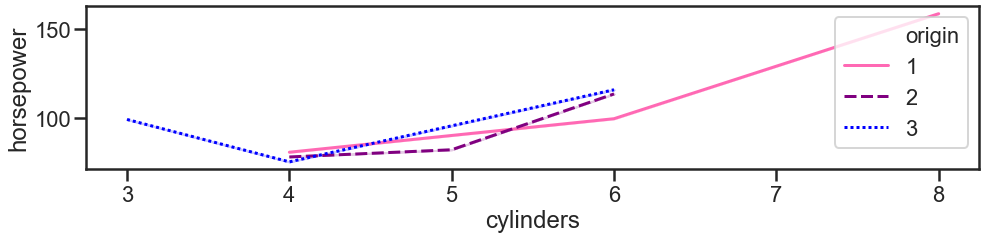

In [91]:
dx = sns.lineplot(x = 'cylinders', y = 'horsepower', data = cars, hue = 'origin', style = 'origin',  palette = ["hotpink", "purple", "blue"], ci= False)

In [83]:
#why do the orgin 3 cylinders decline at 4 cylinders?
#why did it only take off the 

In [93]:
cars.columns
cars.head (25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,binned_acceleration
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,"(10.4, 12.8]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,"(10.4, 12.8]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,"(10.4, 12.8]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,"(10.4, 12.8]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,"(10.4, 12.8]"
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,"(7.983, 10.4]"
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,"(7.983, 10.4]"
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,"(7.983, 10.4]"
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,"(7.983, 10.4]"
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,"(7.983, 10.4]"


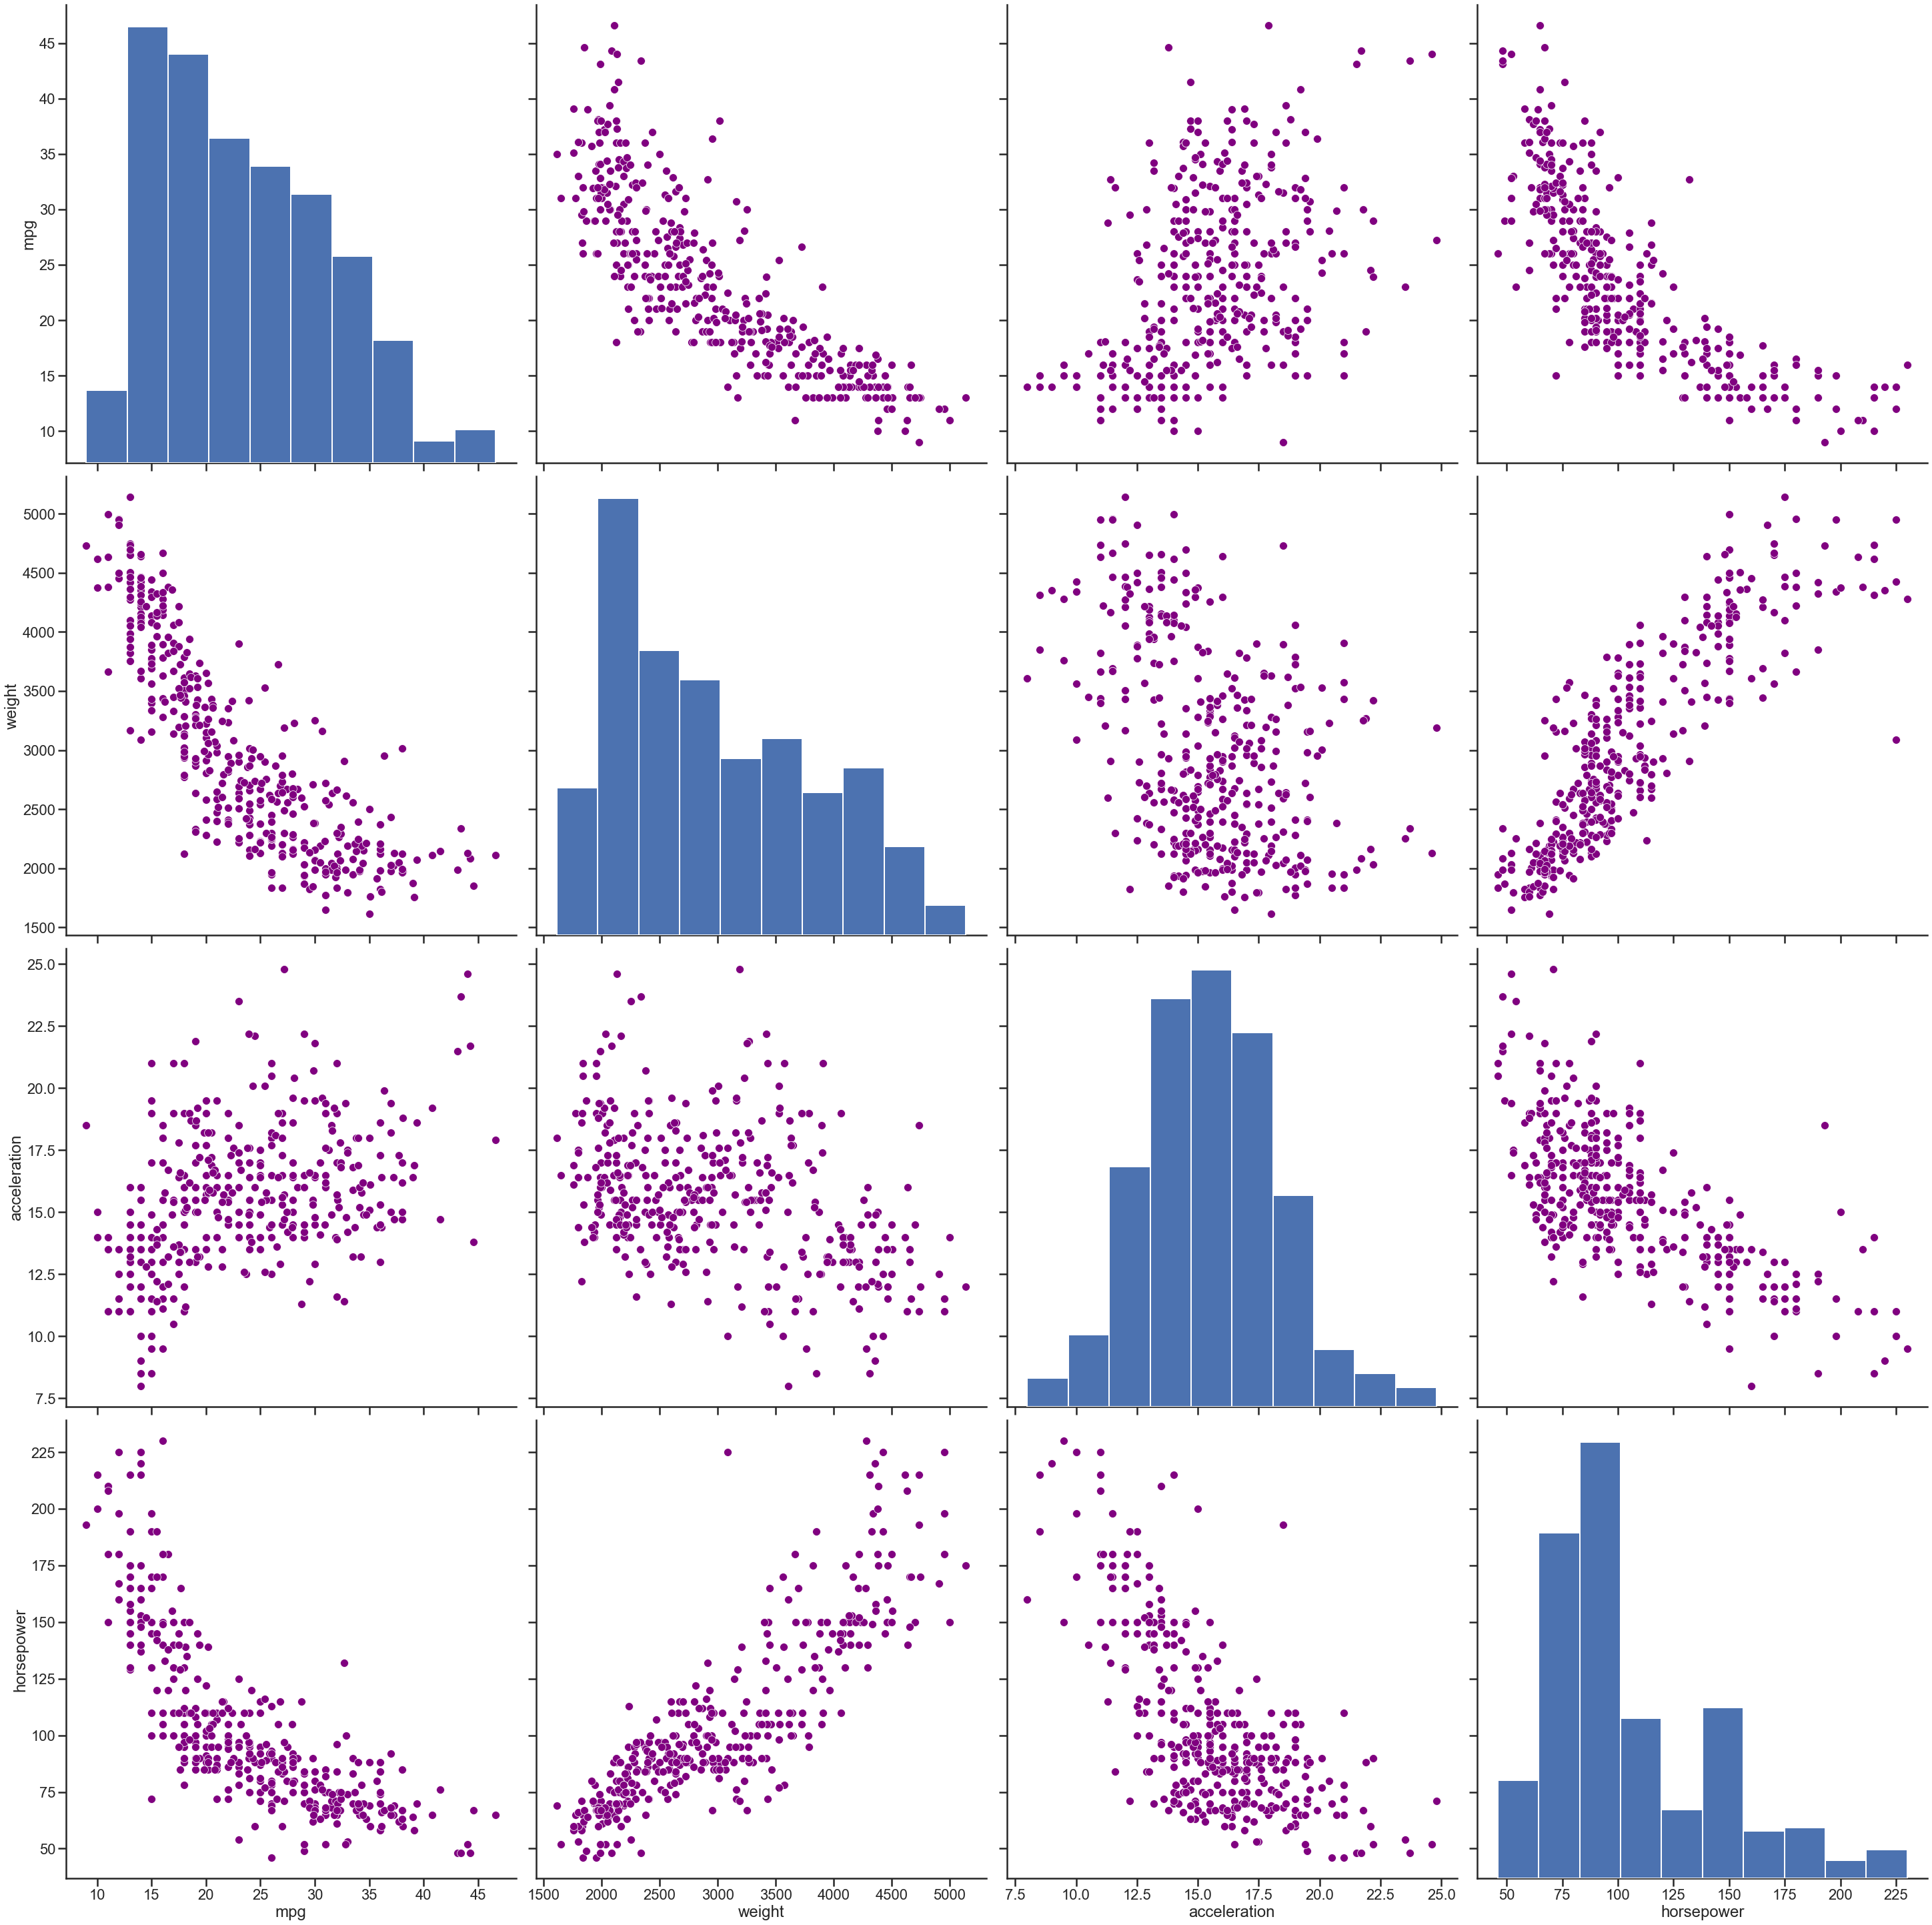

In [94]:
sns.pairplot(cars[['mpg','weight','acceleration','horsepower']], plot_kws = {"color": "purple"}, height = 10)


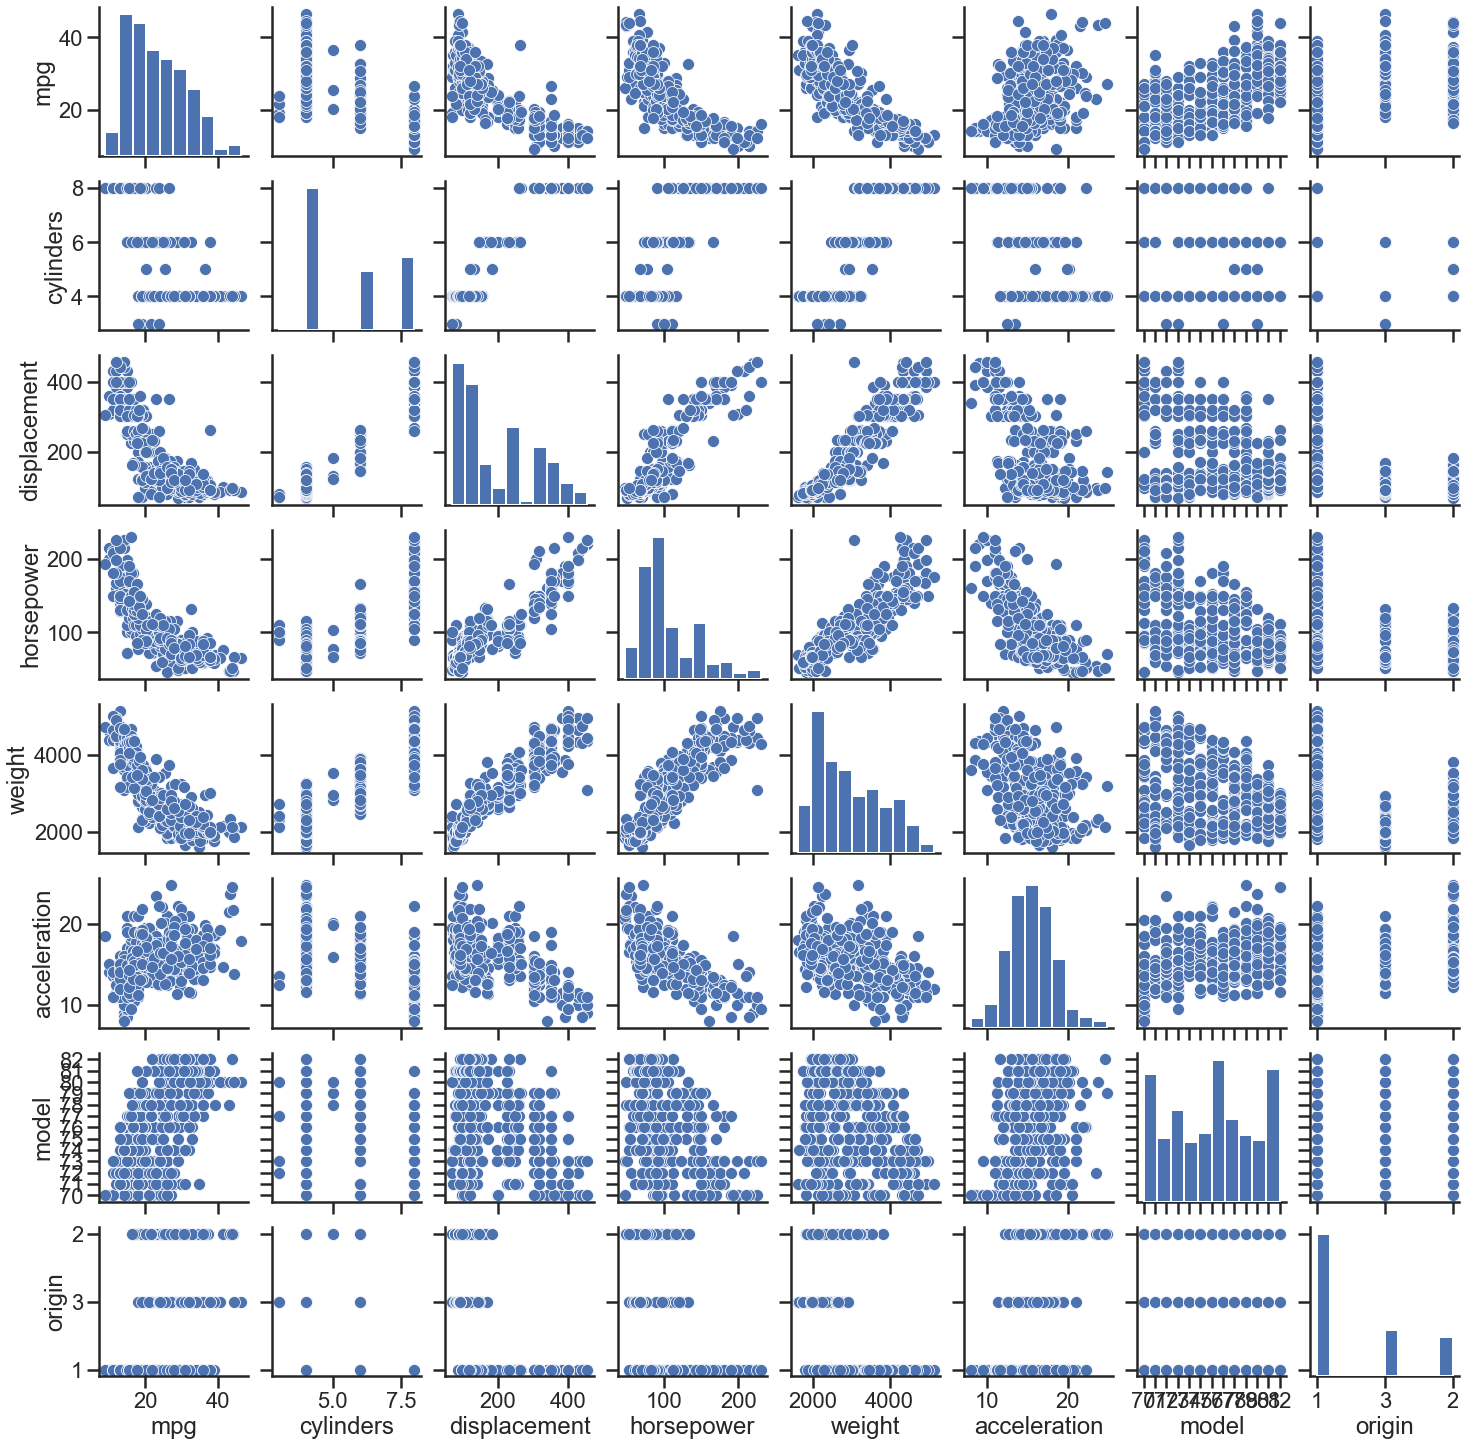

In [95]:
sns.pairplot(cars)


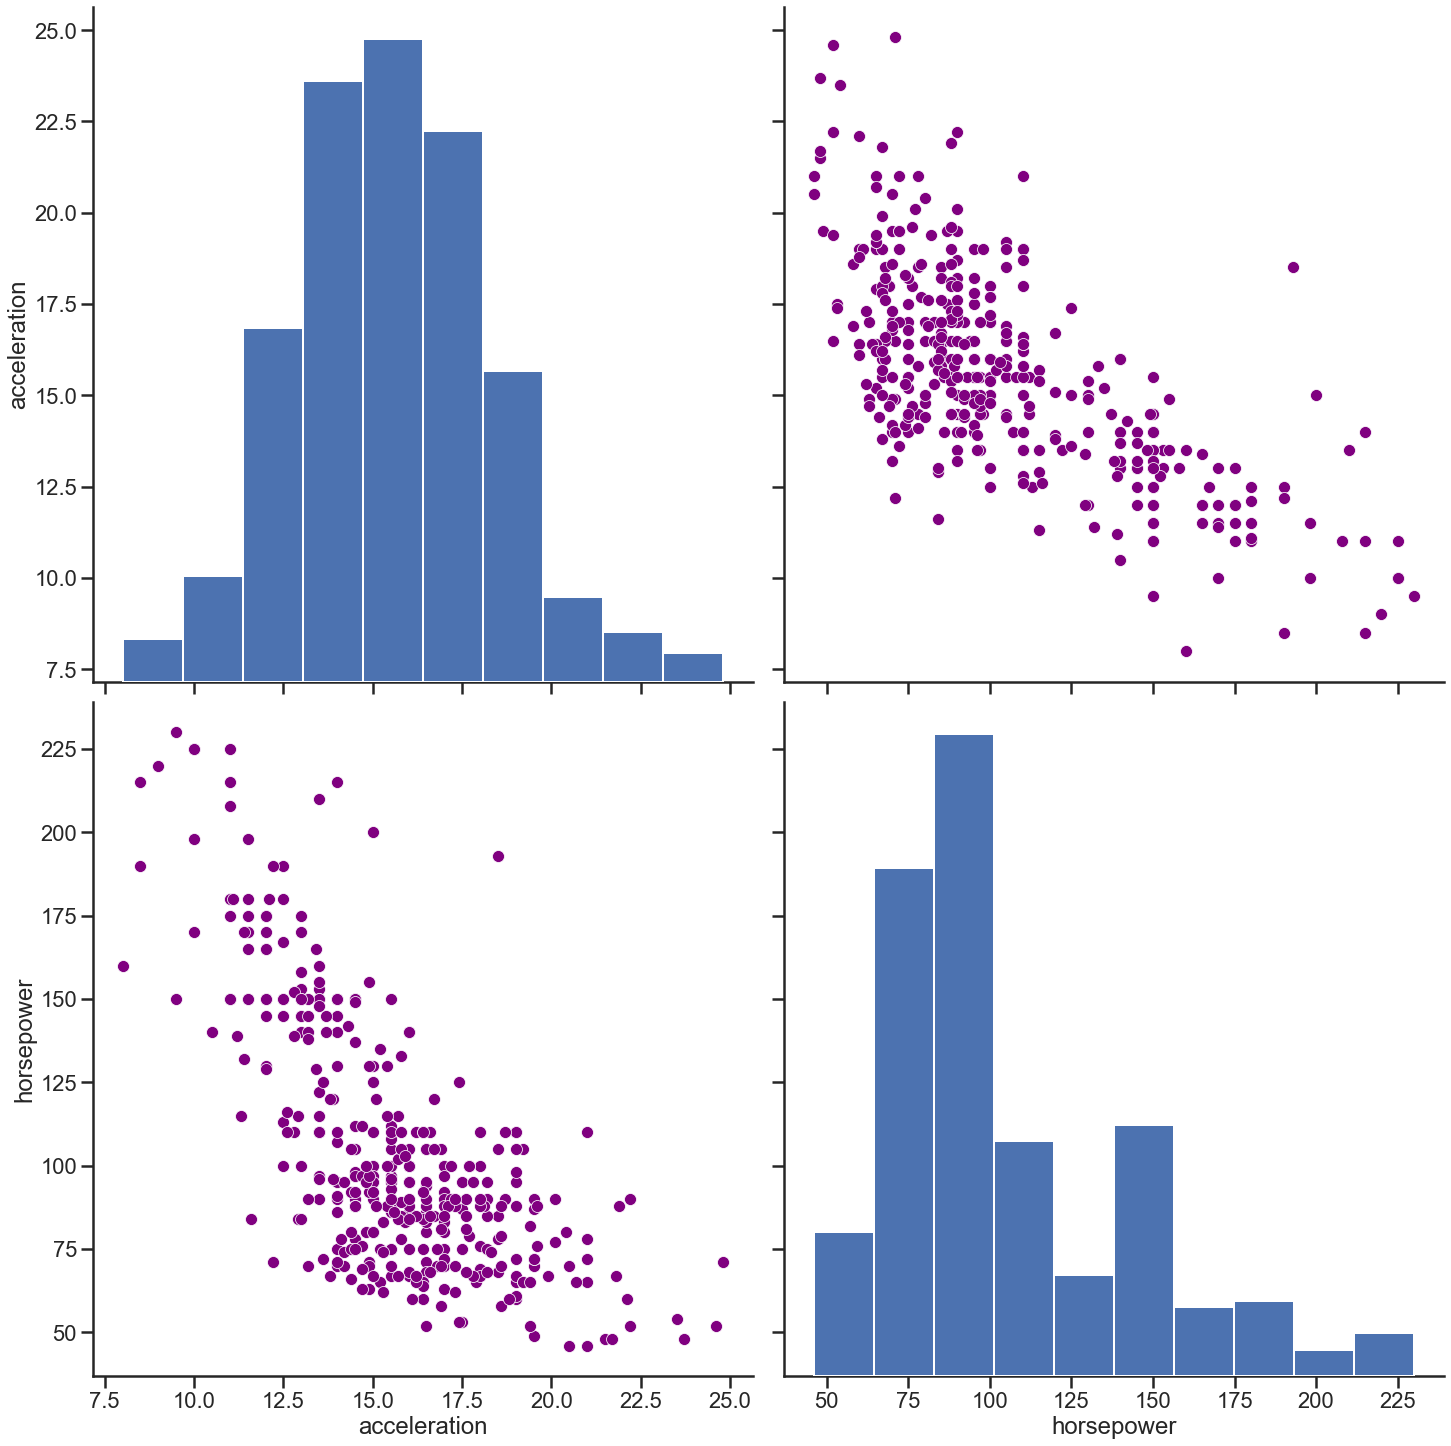

In [96]:
sns.pairplot(cars[['acceleration','horsepower']], plot_kws = {"color": "purple"}, height = 10)


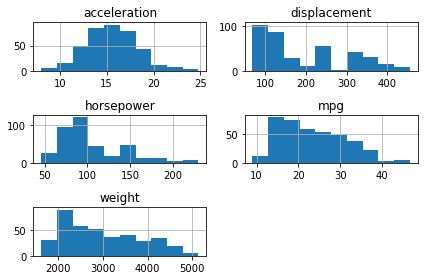

In [21]:
# Histograms
ax = cars[numeric_vars].hist(bins=10)
plt.tight_layout()

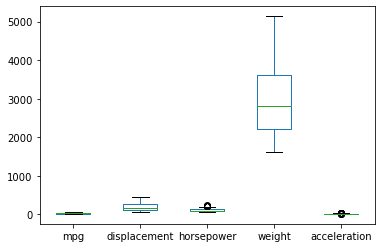

In [22]:
# Boxplots - visualize the minimum, 
#first quartile, median, third quartile, and maximum

cars[numeric_vars].plot(kind='box')

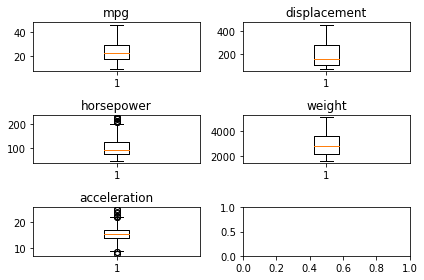

In [23]:
# To better visualize the boxplots, let's plot them one at a time.
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), numeric_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

### Univariate - Categorical

Text(0, 0.5, 'frequency')

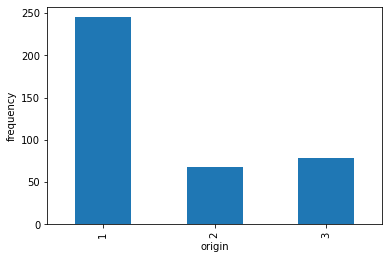

In [24]:
# Categorical
agg = cars.groupby('origin').apply(len)
agg.plot(kind='bar').set_ylabel('frequency')

Text(0, 0.5, 'average mpg')

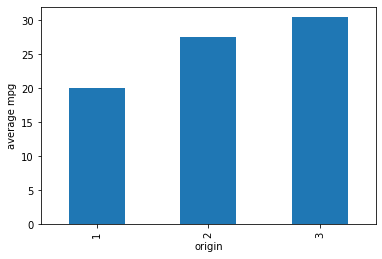

In [25]:
# Categorical vs Numeric
agg = cars.groupby('origin')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

### Numeric vs Numeric

C:\Users\Shan\miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


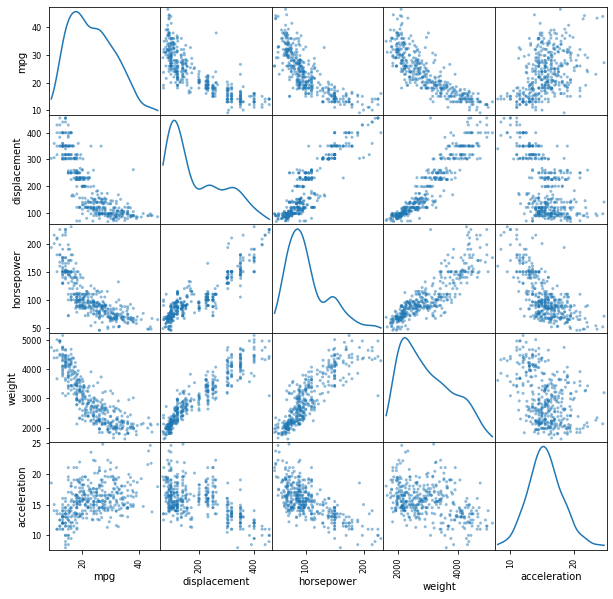

In [26]:
# Scatterplot matrix
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = scatter_matrix(cars[numeric_vars], ax=ax, diagonal='kde')

Text(0, 0.5, 'average mpg')

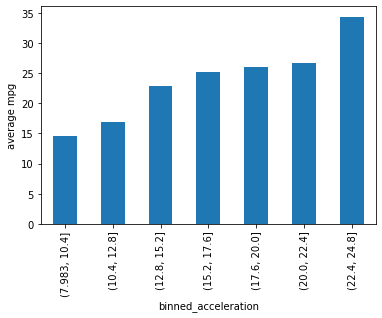

In [27]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=7)
agg = cars.groupby('binned_acceleration')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

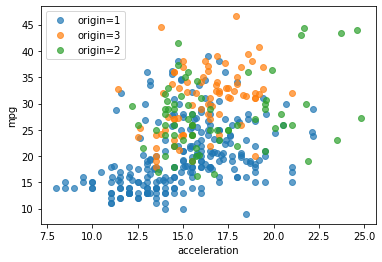

In [28]:
# Scatter plot by category
origins = cars['origin'].unique()
for origin in origins:
    plt.plot(cars.loc[cars.origin==origin,'acceleration'], 
             cars.loc[cars.origin==origin,'mpg'], 
             linestyle='',
             marker='o',
             alpha=.7,
             label="origin="+origin)
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(numpoints=1)

In [29]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['model'])

model,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we probably should have left this as numeric

Text(0.5, 1.0, 'MPG by origin and model year')

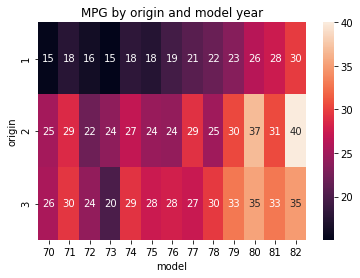

In [30]:
# Heat-map
import seaborn as sns

agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year')

## Linear Regression

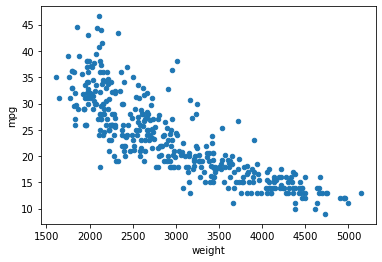

In [31]:
# Single variable regression
cars.plot('weight','mpg',kind='scatter')

Linear regression is just the fancy term for finding the line of best fit. If I was going to eyeball it from this data, I would draw the line from (1000,40) through (5500,5).

In other words, we are looking for the slope and intercept that defines a line that fits the data as well as possible.

'As well as possible' means that we are trying to minimize the mean-squared-error

-0.010000000000000002 55.00000000000001


(1000.0, 5500.0)

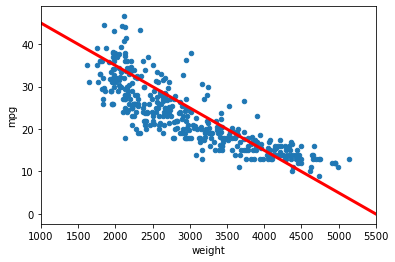

In [32]:
# Make a guess at the line of best fit
first_point = [1000,45]
second_point = [5500, 0]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)

print(slope, intercept)

# Plot the line along with the data
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

How can we measure the error? The typical choice is to use mean squared error. The error for a given data point is the difference between the observed value and the predicted value
$$
MSE := \frac{1}{n} \sum_{i=1}^n (y_i - (mx_i + b))^2
$$


In [33]:
# Mean Squared Error

def mean_squared_error(X, y, m, b):
    """
    Compute the mean squared error, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    error = y - pred
    mse = np.mean(error**2)
    return mse

mean_squared_error(cars['weight'], cars['mpg'], slope, intercept)

25.82198188775511

## R-Squared

Mean squared error is a good error metric, but it is not comparable across different data sets. For this we use a scaled version called $R^2$. 
\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - (mx_i + b))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

$R^2$ will be between 0 and 1. 0 means that your model explains none of the variance in the data, while 1 means your model explains all of the variance in the data. The higher $R^2$, the better!

In [34]:
# Calculate r-squared

def r_squared(X, y, m, b):
    """
    Compute the r-squared, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    resid = y - pred
    rsquared = 1 - np.sum(resid**2)/np.sum((y-y.mean())**2)
    return rsquared

r_squared(cars['weight'], cars['mpg'], slope, intercept)
    

0.575035909346501

## Ordinary least squares
It turns out that we can find the slope and intercept which *minimize* the mean squared error, using a procedure called ordinary least squares

Ordinary least squares is implemented in the *statsmodels* package. The advantage of *statsmodels* is that we also have access to a number of *regression diagnostics* that help us understand if this model might be good for UNDERSTANDING as well as PREDICTION.

In [35]:
'''
Recall that the form of a straight line is y = m * x + b. 
Statsmodels will compute m by default for your regression. 
But (don't ask) it DOES NOT COMPUTE b by default. It omits 'b'!!!!!!!!
If 'b' is omitted, that implies b = 0, so the line must pass through the origin (0,0)! 

You almost never want b=0 when you do a regression.
So, to force statsmodels to compute both 'm' and 'b', you must use the sm.add_constant function on your predictors (x)
'''

import statsmodels.api as sm
#for example, let's do a regression of weight (predictor) versus mpg(target output)
X = pd.DataFrame({'weight' : cars['weight']})


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
X

In [ ]:
#now we need to change our predictor matrix X to tell statsmodels to also calculate the intercept 'b'
# To do that, we need to add a column of ones to our data (why? see definition of matrix multiplication)
X = sm.add_constant(X)
X


In [ ]:
#so, all together now. let's do a regression of weight (predictor) versus mpg(target output)
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X) # as described above, this line forces statsmodels to solve for both 'm' and 'b'!
y = cars['mpg']

# Use statsmodels to create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

In [ ]:
#check out that summary!!!!
#if you Google "what does the ols output from statsmodels mean", you will go down a rabbit hole 

# https://datatofish.com/statsmodels-linear-regression/
# https://blog.datarobot.com/ordinary-least-squares-in-python
# https://python.quantecon.org/ols.html
# https://heartbeat.fritz.ai/implementing-ordinary-least-squares-ols-using-statsmodels-in-python-b1f4dee09419

In [ ]:
dir(regressor)

## Model Diagnostics

**coef** - The values of the coefficients in the model

**$P>|t|$** - The p-value of the null hypothesis that a specific parameter is zero.

**R-Squared** - Proportion of variance explained by the model. Measured on a scale from 0 (bad) to 1 (good)

**Prob (F-statistic)** - p-value of the F-statistic. This is the probability of the null hypothesis that *all parameters in the model are zero*

In [ ]:
# Plot the line along with the data
slope = -.0076
intercept = 46.2165
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

This line is a better fit than our original guess. We can tell because its $R^2$ is higher, meaning it explains the mpg's variance better. The MSE of this fit will be lower (better) than our original guess as well.

In [ ]:
# use weight-squared as a new column

In [ ]:
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X)
y = cars['mpg']

In [ ]:
X['weight-squared'] = X['weight'].apply(lambda x: x*x) #explicitly makes new column

In [ ]:
X

In [ ]:
#Linear Regression of MPG against Weight
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X) # as described above, this line forces statsmodels to solve for both 'm' and 'b'!
y = cars['mpg']

# Use statsmodels to create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

# TASK: Made a model that depends does a linear regression of mpg against Weight and weight ^2

In [ ]:
#solution 1 - #explicitly makes new column in X

import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X)
y = cars['mpg']
X['weight-squared'] = X['weight'].apply(lambda x: x*x) 
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

In [ ]:
#Solution #2  - Using code from insects.ipynb as a model

import statsmodels.formula.api as smf
X = pd.DataFrame({'weight' : cars['weight'], 'mpg': cars['mpg']})
linear_model = smf.ols(formula='mpg ~ weight + I(weight**2)',
                       data=X)
fitted_model = linear_model.fit()
fitted_model.summary()

In [ ]:
#go back to cars
cars = cars[cars.horsepower.notna()]
cars.info()

In [ ]:
linear_model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

In [ ]:
#acceleration
linear_model = smf.ols(formula='mpg ~  acceleration',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

In [ ]:
linear_model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

In [ ]:
linear_model = smf.ols(formula='mpg ~ displacement + horsepower + weight + acceleration + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

### NOTE: ABOVE I DID NOT EXPLICITLY USE THE CATEGORICAL VARIABLES AS CATEGORICAL. I WILL DO SO HERE!

In [ ]:
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
categorical_vars = ['model', 'origin', 'cylinders']

In [ ]:
#use all the variables and explicitly mark the categorical ones in the with C()
# also restored the weight**2 term in the model

import pandas as pd
import statsmodels.formula.api as smf

cars = pd.read_csv('DATA/cars_multivariate.csv',na_values=['?'])
cars = cars[cars.horsepower.notna()]

formula = 'mpg ~ displacement + horsepower + weight + I(weight**2) +acceleration  + C(origin) + C(cylinders) + C(model)'
linear_model = smf.ols(formula=formula, data=cars)
fitted_model = linear_model.fit()
fitted_model.summary()

## Note that when you tell statsmodels that something is a categorial variable, it makes multiple dummy variables out of it!
